# Titanic Survival Prediction 

## Data Dictionary
Here we got the data dictionary. This useful info will help you to understand the csv.

|Variable	|Definition	|Key|
|:----|:-----|:----|
|survival|	Survival|	0 = No, 1 = Yes|
|pclass|	Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|	Sex	| |
|Age|	Age in years| |	
|sibsp|	# of siblings / spouses aboard the Titanic| |
|parch|	# of parents / children aboard the Titanic|	 |
|ticket|	Ticket number|	 |
|fare|	Passenger fare|	 |
|cabin|	Cabin number| |	
|embarked|	Port of Embarkation|	C = Cherbourg, Q = Queenstown, S = Southampton |

## Variable Notes

**pclass:** A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp:** The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch:** The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

Please check https://www.kaggle.com/c/titanic/data 

**Let's waggle the data!!!**

# Import useful modules

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')

# Anaconda on Windows will get warning

# Loading data from CSV

In [2]:
df=pd.read_csv('train.csv')

# Show first 5 records

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Histogram
Nice tool to help you understand the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ED83927358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001ED840001D0>]], dtype=object)

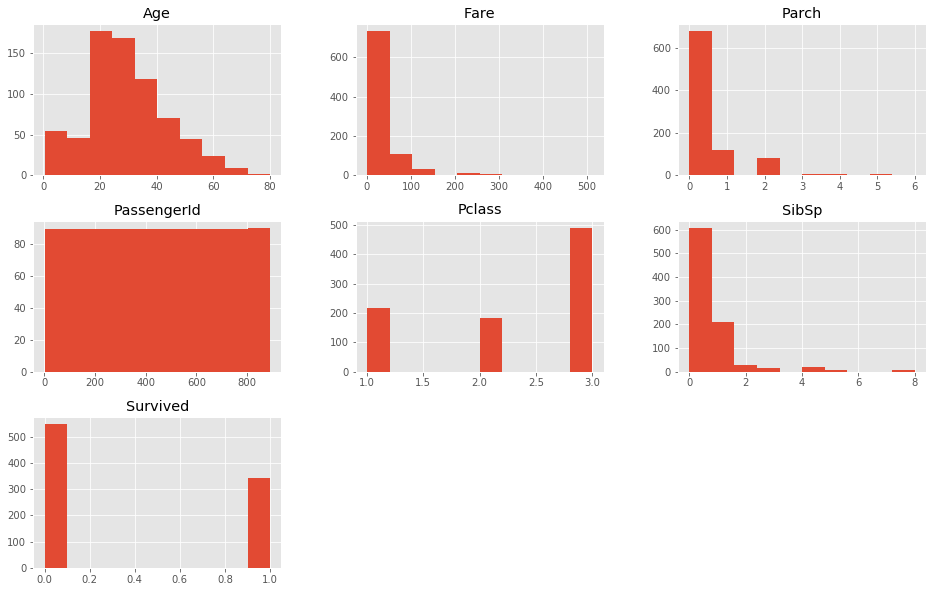

In [4]:
df.hist( figsize=(16, 10))

# Show statistic

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Show list of column names

In [6]:
df.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Drop some unnecessary columns

In [7]:
df2=df.drop(['Name','PassengerId','Cabin','Ticket'],1)

In [8]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# From column 'Sex', create another numeric column (sexc)
Randonforest cannot process text data. All data must be numeric type.

In [9]:
code={'female':0,'male':1}
for k,i in df2.iterrows():
    df2.loc[k,"sexc"]=code[i['Sex']]

In [10]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,sexc
0,0,3,male,22.0,1,0,7.2500,S,1.0
1,1,1,female,38.0,1,0,71.2833,C,0.0
2,1,3,female,26.0,0,0,7.9250,S,0.0
3,1,1,female,35.0,1,0,53.1000,S,0.0
4,0,3,male,35.0,0,0,8.0500,S,1.0


# Count number of records of each category

In [11]:
df2["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

# From column 'Embarked', create another numeric column (embarkedc)

In [12]:

code={'C':0,'Q':1, 'S':2}
for k,i in df2.iterrows():
    if i['Embarked']==i['Embarked']:
        df2.loc[k,"embarkedc"]=code[i['Embarked']]

In [13]:
df2.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,sexc,embarkedc
0,0,3,male,22.0,1,0,7.2500,S,1.0,2.0
1,1,1,female,38.0,1,0,71.2833,C,0.0,0.0
2,1,3,female,26.0,0,0,7.9250,S,0.0,2.0
3,1,1,female,35.0,1,0,53.1000,S,0.0,2.0
4,0,3,male,35.0,0,0,8.0500,S,1.0,2.0
5,0,3,male,NaN,0,0,8.4583,Q,1.0,1.0
6,0,1,male,54.0,0,0,51.8625,S,1.0,2.0
7,0,3,male,2.0,3,1,21.0750,S,1.0,2.0
8,1,3,female,27.0,0,2,11.1333,S,0.0,2.0
9,1,2,female,14.0,1,0,30.0708,C,0.0,0.0


In [14]:
#remove the original column
df3=df2.drop(['Sex','Embarked'],1)

# Drop every NaN row

In [15]:
df4=df3.dropna(axis=0)
df4.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,sexc,embarkedc
0,0,3,22.0,1,0,7.2500,1.0,2.0
1,1,1,38.0,1,0,71.2833,0.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,2.0
3,1,1,35.0,1,0,53.1000,0.0,2.0
4,0,3,35.0,0,0,8.0500,1.0,2.0
6,0,1,54.0,0,0,51.8625,1.0,2.0
7,0,3,2.0,3,1,21.0750,1.0,2.0
8,1,3,27.0,0,2,11.1333,0.0,2.0
9,1,2,14.0,1,0,30.0708,0.0,0.0
10,1,3,4.0,1,1,16.7000,0.0,2.0


# Convert Dataframe to numpy array for Clustering

In [16]:
import numpy as np
A=df4.as_matrix([df4.columns[:]])
X=df4.as_matrix([df4.columns[[2,5]]])
X[:,1]=np.log(X[:,1]+1)

In [17]:

from sklearn.cluster import DBSCAN
db = DBSCAN(eps=2.0, min_samples=20).fit(X)
db.labels_.max()

1

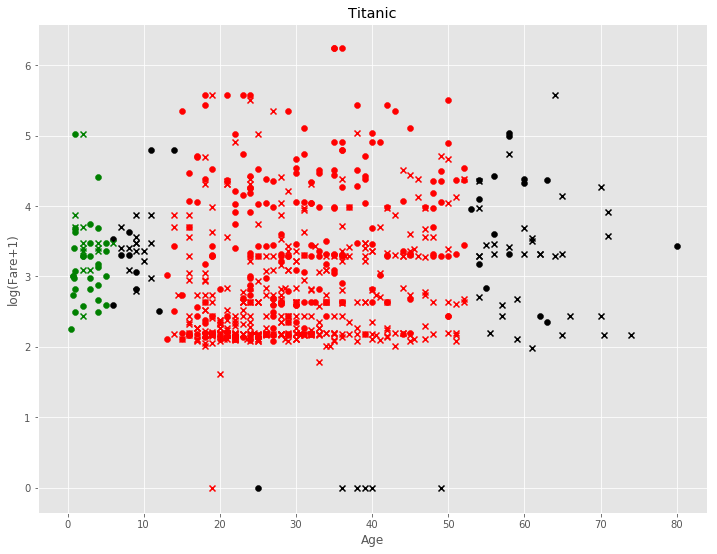

In [18]:
ax=plt.figure(figsize=(12,9))
#plt.rcParams['figure.figsize'] = (12,9)
plt.xlabel("Age")
plt.ylabel("log(Fare+1)")
plt.title("Titanic")
#plt.yscale('log')
color_list=['r','g','b','c','m','y','k']
for i in range( -1,db.labels_.max()+1 ):
    is_survive=(A[:,0]==1) & (db.labels_==i)
    plt.scatter(X[is_survive,0], X[is_survive,1], marker='o',color=color_list[i])
    
    is_not_survive=(A[:,0]==0) & (db.labels_==i)
    plt.scatter(X[is_not_survive,0], X[is_not_survive,1], marker='x',color=color_list[i])